<a href="https://colab.research.google.com/github/HungVLe/CMPE255/blob/main/Data_cleaning_practice_exercise_Hung_Le.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data cleaning practice exercise_Hung Le**
Dataset name: IOT-temp.csv

Dataset source: https://www.kaggle.com/atulanandjha/temperature-readings-iot-devices




In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving IOT-temp.csv to IOT-temp.csv


In [ ]:
dataset = pd.read_csv('IOT-temp.csv',parse_dates=["noted_date"])
dataset.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,2018-08-12 09:30:00,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,2018-08-12 09:30:00,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,2018-08-12 09:29:00,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,2018-08-12 09:29:00,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,2018-08-12 09:29:00,31,In


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          97606 non-null  object        
 1   room_id/id  97606 non-null  object        
 2   noted_date  97606 non-null  datetime64[ns]
 3   temp        97606 non-null  int64         
 4   out/in      97606 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 3.7+ MB


In [ ]:
# Get unique count for each column
dataset.nunique()

id            97605
room_id/id        1
noted_date    27920
temp             31
out/in            2
dtype: int64

## Data Cleaning and Preprocessing##

We can see that the 'room_id/id' has only one unique value, so we can drop this column. We can also drop 'id' column since it's useless

In [ ]:
dataset.drop(['room_id/id', 'id'], axis=1, inplace=True)
dataset.head()

,noted_date,temp,out/in
0,2018-08-12 09:30:00,29,In
1,2018-08-12 09:30:00,29,In
2,2018-08-12 09:29:00,41,Out
3,2018-08-12 09:29:00,41,Out
4,2018-08-12 09:29:00,31,In


In [ ]:
# Drop NA rows
dataset = dataset.dropna()
dataset.isnull().sum()

noted_date    0
temp          0
out/in        0
dtype: int64

In [ ]:
dataset.shape

(97606, 3)

In [ ]:
# Drops duplicates
dataset = dataset.drop_duplicates()
dataset.shape

(37268, 3)

After dropping duplicates, we have 37268 remains

In [ ]:
# Sorting the dataset by noted_date
dataset = dataset.sort_values(by=["noted_date"]).reset_index(drop=True)
dataset.head(10)

,noted_date,temp,out/in
0,2018-01-11 00:06:00,32,In
1,2018-01-11 00:07:00,40,Out
2,2018-01-11 00:09:00,39,Out
3,2018-01-11 00:13:00,40,Out
4,2018-01-11 00:23:00,40,Out
5,2018-01-11 00:25:00,40,Out
6,2018-01-11 00:31:00,41,Out
7,2018-01-11 00:33:00,40,Out
8,2018-01-11 00:37:00,39,Out
9,2018-01-11 00:41:00,41,Out


In [ ]:
# Pivot the dataset into table for In and Out temperature

pivot_dataset = dataset.reset_index().pivot_table(values='temp', index='noted_date', columns='out/in', aggfunc='mean')
pivot_dataset.columns.name = None

pivot_dataset.head()

,In,Out
noted_date,,
2018-01-11 00:06:00,32.0,NaN
2018-01-11 00:07:00,NaN,40.0
2018-01-11 00:09:00,NaN,39.0
2018-01-11 00:13:00,NaN,40.0
2018-01-11 00:23:00,NaN,40.0


In [ ]:
# Resample the dataset based on the mean value of temparature measurements within one month
monthly_dataset = pivot_dataset.resample("1M").mean()
monthly_dataset.head()

,In,Out
noted_date,,
2018-01-31,30.453608,40.352573
2018-02-28,31.140625,40.136334
2018-03-31,31.215877,36.866203
2018-04-30,29.750000,38.078765
2018-05-31,29.313472,39.524880


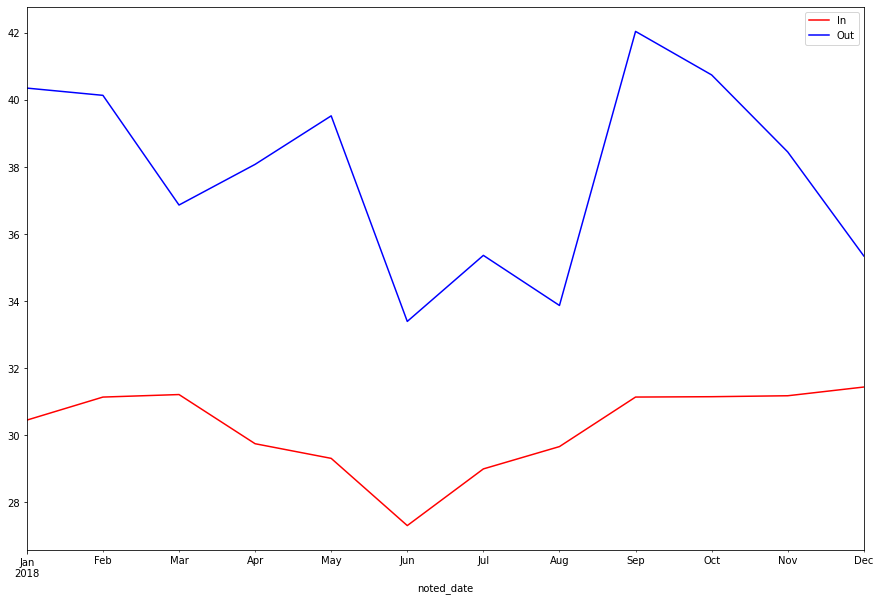

In [ ]:
# Plot the data to visualize the average In and Out temperature for each month of the year 2018
df = pd.DataFrame(monthly_dataset)
df.plot(color=['red','blue'], figsize=(15, 10))